<a href="https://colab.research.google.com/github/LGreenII/CS4410MachineLearning/blob/main/LevonGreenFaceRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==2.5.0 tensorflow-gpu==2.5.0 opencv-python mediapipe sklearn matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 454.3 MB 16 kB/s 
     |████████████████████████████████| 454.3 MB 20 kB/s 
     |████████████████████████████████| 31.5 MB 1.4 MB/s 
     |████████████████████████████████| 14.8 MB 55.6 MB/s 
     |████████████████████████████████| 4.0 MB 58.0 MB/s 
     |████████████████████████████████| 462 kB 67.0 MB/s 
     |████████████████████████████████| 132 kB 76.7 MB/s 
     |████████████████████████████████| 1.2 MB 57.7 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68722 sha256=53923658004173c42156450071b5197ef9819d18bc64237128a1df85b84c3a4a
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=4819571625dd41ee5be243ddfdb406b5dd088c62d32f55c2a8c15a647afd5c48
  Stored in dire

In [2]:
!pip install dlib==19.18

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.0 MB 39.4 MB/s 
  Attempting uninstall: dlib
    Found existing installation: dlib 19.24.0
    Uninstalling dlib-19.24.0:
      Successfully uninstalled dlib-19.24.0


In [3]:
!pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100.1 MB 1.2 MB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=32fc3d05136a51f2924c7ddf0fdbf23286d1df1b1d0805ac64d38d73fbaf8f18
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


Try uploading files to Github and importing from Github

In [ ]:
# !mkdir known
# !wget https://github.com/LGreenII/CS4410MachineLearning/blob/dc01dc89c104a4ce8df3a7ea6981904b33647444/known/Aaron%20Peirsol.jpg
# !wget https://github.com/LGreenII/CS4410MachineLearning/blob/main/known/Adam%20Sandler.jpg
# !wget https://github.com/LGreenII/CS4410MachineLearning/blob/main/known/Adam%20Scott.jpg
# !wget https://github.com/LGreenII/CS4410MachineLearning/blob/main/known/Ben%20Affleck.jpg
# !wget https://github.com/LGreenII/CS4410MachineLearning/blob/main/known/Donald%20Trump.jpg
# !wget https://github.com/LGreenII/CS4410MachineLearning/blob/main/known/Mike%20Pence.jpg


In [ ]:
# !mkdir unknown
# !wget https://github.com/LGreenII/CS4410MachineLearning/blob/main/unknown/Aaron_Peirsol_0003.jpg
# !wget https://github.com/LGreenII/CS4410MachineLearning/blob/main/unknown/Adam_Sandler_0004.jpg
# !wget https://github.com/LGreenII/CS4410MachineLearning/blob/main/unknown/Adam_Scott_0002.jpg
# !wget https://github.com/LGreenII/CS4410MachineLearning/blob/main/unknown/Ben_Affleck_0007.jpg
# !wget https://github.com/LGreenII/CS4410MachineLearning/blob/main/unknown/Zydrunas_Ilgauskas_0001.jpg

In [4]:
import face_recognition
import numpy as np
import os
from google.colab.patches import cv2_imshow
import pandas as pd
import cv2   
from skimage import io
from PIL import Image
import matplotlib.pylab as plt
from pathlib import Path

def read_img(path):
  img = cv2.imread(path)
  (h, w) = img.shape[:2]
  width = 500
  ratio = width / float(w)
  height = int(h*ratio)
  return cv2.resize(img, (width, height))

known_encodings = []
known_names = []
known_dir = '/content/drive/MyDrive/Face_recognition/known/'


In [6]:
for file in os.listdir(known_dir):
  img = read_img(known_dir+file)
  img_enc = face_recognition.face_encodings(img)[0]
  known_encodings.append(img_enc)
  known_names.append(file.split('.')[0])


Processing Adam_Scott_0002.jpg


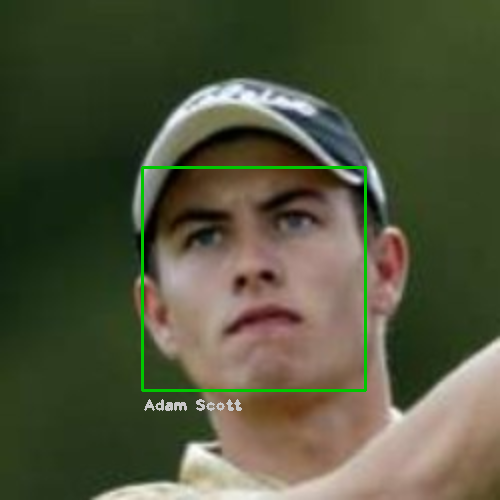

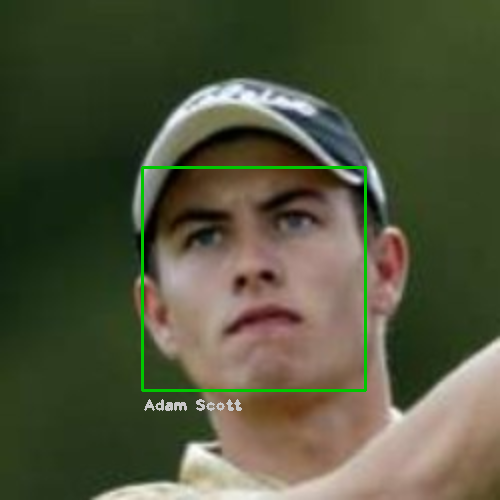

Processing Ben_Affleck_0007.jpg


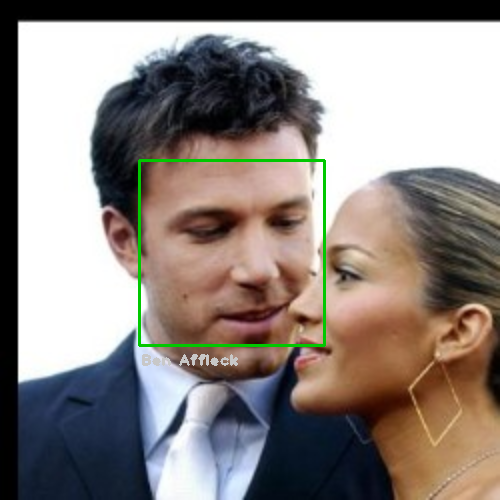

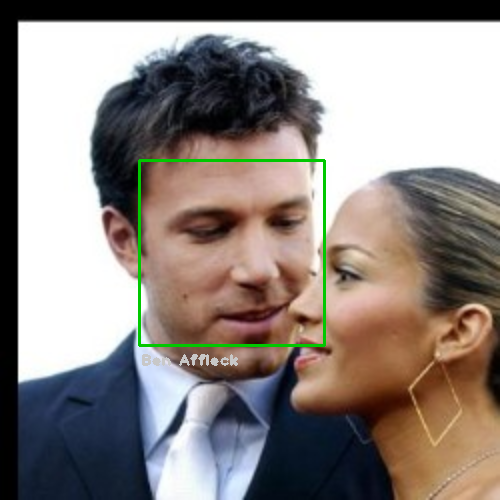

Processing Zydrunas_Ilgauskas_0001.jpg
Processing Adam_Sandler_0004.jpg


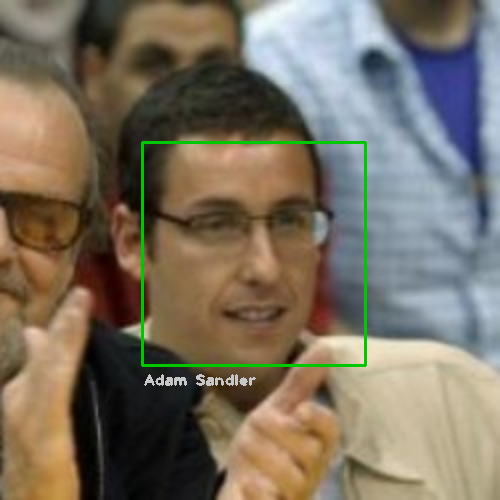

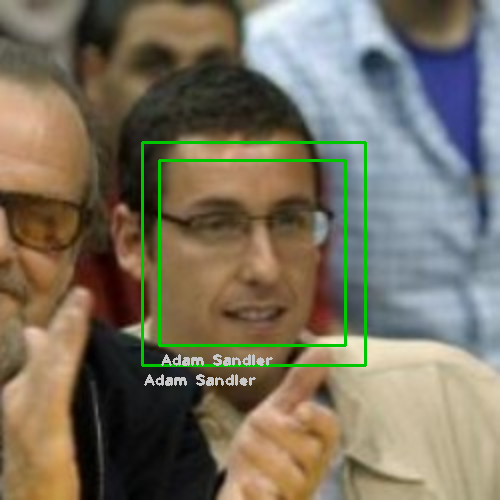

Processing Aaron_Peirsol_0003.jpg


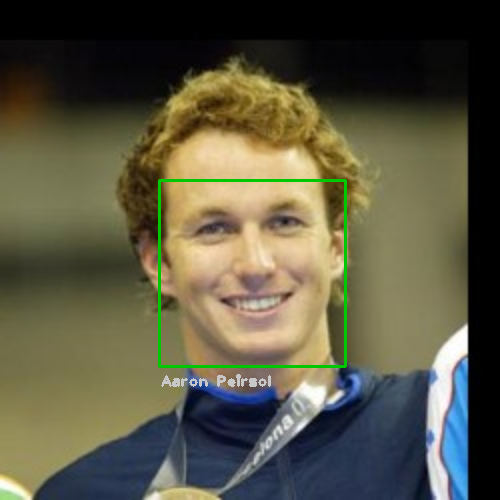

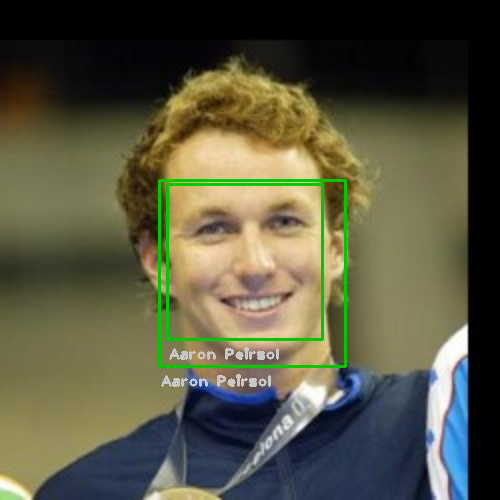

Processing barackObama002.jpg


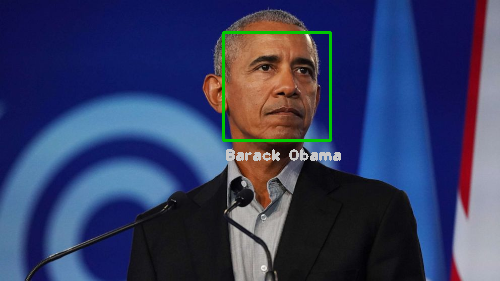

Processing DonaldTrump001.jpg


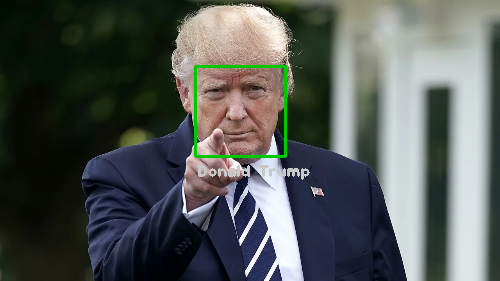

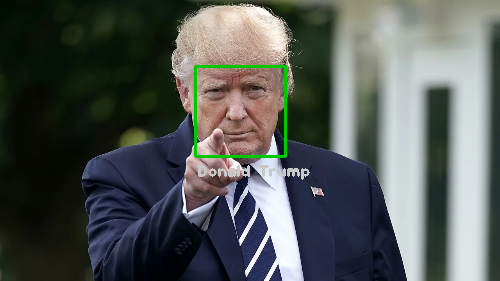

Processing ViolaDavis001.jpg


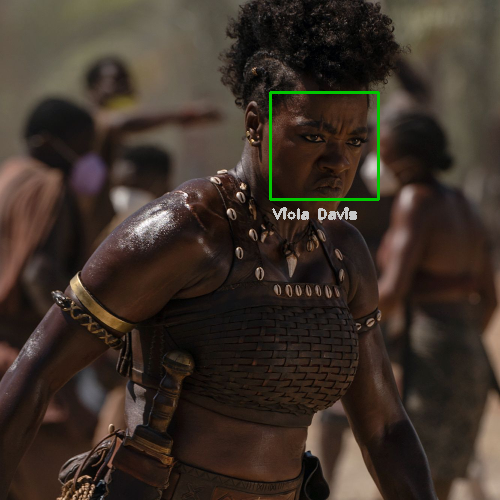

Processing BarackObama001.jpg


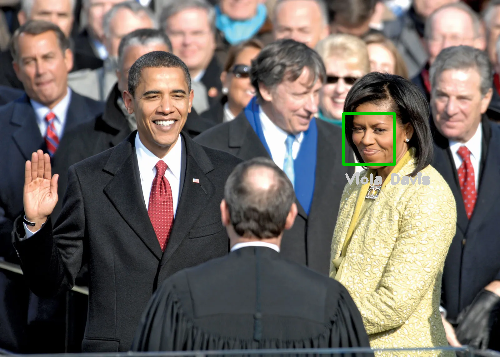

In [17]:
unknown_dir = '/content/drive/MyDrive/Face_recognition/unknown/'
for file in os.listdir(unknown_dir):
  print("Processing", file)
  img = read_img(unknown_dir+file)
  img_enc = face_recognition.face_encodings(img)[0]
  results = face_recognition.compare_faces(known_encodings,img_enc)

  # print(face_recognition.face_distance(known_encodings, img_enc))
  for i in range(len(results)):
    if results[i]:
      name = known_names[i]
      (top, right, bottom, left) = face_recognition.face_locations(img)[0]
      cv2.rectangle(img, (left, top), (right, bottom), (0,200,0), 2)
      cv2.putText(img, name, (left+2, bottom+20), cv2.FONT_HERSHEY_PLAIN, 1.0, (200, 200, 200), 2)
      cv2_imshow(img)

  #   print(results)